In [1]:
# Import Dependencies
import pandas as pd
from numpy.random import seed
seed(1)

In [2]:
# Import Dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor

In [3]:
# Import and Print DataSet
test_data = pd.read_csv('Resources/cleaned_test.csv')

In [4]:
# Import and Print DataSet
train_data = pd.read_csv('Resources/cleaned_trained.csv')

In [5]:
test_data.head()

,Id,LotArea,Utilities,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,...,Fireplaces,FireplaceQu,GarageType,GarageArea,GarageCond,PavedDrive,MoSold,YrSold,SaleType,SaleCondition
0,1461,11622,AllPub,Inside,NAmes,Feedr,Norm,1Fam,1Story,5,...,0,NaN,Attchd,730.0,TA,Y,6,2010,WD,Normal
1,1462,14267,AllPub,Corner,NAmes,Norm,Norm,1Fam,1Story,6,...,0,NaN,Attchd,312.0,TA,Y,6,2010,WD,Normal
2,1463,13830,AllPub,Inside,Gilbert,Norm,Norm,1Fam,2Story,5,...,1,TA,Attchd,482.0,TA,Y,3,2010,WD,Normal
3,1464,9978,AllPub,Inside,Gilbert,Norm,Norm,1Fam,2Story,6,...,1,Gd,Attchd,470.0,TA,Y,6,2010,WD,Normal
4,1465,5005,AllPub,Inside,StoneBr,Norm,Norm,TwnhsE,1Story,8,...,0,NaN,Attchd,506.0,TA,Y,1,2010,WD,Normal


In [6]:
train_data.head()

,Id,LotArea,Utilities,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,...,FireplaceQu,GarageType,GarageArea,GarageCond,PavedDrive,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,8450,AllPub,Inside,CollgCr,Norm,Norm,1Fam,2Story,7,...,NaN,Attchd,548,TA,Y,2,2008,WD,Normal,208500
1,2,9600,AllPub,FR2,Veenker,Feedr,Norm,1Fam,1Story,6,...,TA,Attchd,460,TA,Y,5,2007,WD,Normal,181500
2,3,11250,AllPub,Inside,CollgCr,Norm,Norm,1Fam,2Story,7,...,TA,Attchd,608,TA,Y,9,2008,WD,Normal,223500
3,4,9550,AllPub,Corner,Crawfor,Norm,Norm,1Fam,2Story,7,...,Gd,Detchd,642,TA,Y,2,2006,WD,Abnorml,140000
4,5,14260,AllPub,FR2,NoRidge,Norm,Norm,1Fam,2Story,8,...,TA,Attchd,836,TA,Y,12,2008,WD,Normal,250000


In [7]:
# Y
y = train_data['SalePrice']
print(y)

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64


In [8]:
columns = train_data.columns
print(columns)

Index(['Id', 'LotArea', 'Utilities', 'LotConfig', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtFinType2',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageArea', 'GarageCond', 'PavedDrive',
       'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'SalePrice'],
      dtype='object')


In [9]:
names = ["Id","LotArea","Utilities","LotConfig","Neighborhood","Condition1","Condition2","BldgType","HouseStyle","OverallQual",
         "OverallCond", "YearBuilt", "YearRemodAdd", "RoofMatl","Exterior1st","Exterior2nd","MasVnrArea","ExterQual","ExterCond","Foundation","BsmtFinType2","GrLivArea","BsmtFullBath","BsmtHalfBath","FullBath","HalfBath","BedroomAbvGr",
         "KitchenQual","Functional","Fireplaces","FireplaceQu","GarageType","GarageArea","GarageCond","PavedDrive",
         "MoSold","YrSold","SaleType","SaleCondition"]
X = train_data[names].fillna(0)
X.head()

,Id,LotArea,Utilities,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,...,Fireplaces,FireplaceQu,GarageType,GarageArea,GarageCond,PavedDrive,MoSold,YrSold,SaleType,SaleCondition
0,1,8450,AllPub,Inside,CollgCr,Norm,Norm,1Fam,2Story,7,...,0,0,Attchd,548,TA,Y,2,2008,WD,Normal
1,2,9600,AllPub,FR2,Veenker,Feedr,Norm,1Fam,1Story,6,...,1,TA,Attchd,460,TA,Y,5,2007,WD,Normal
2,3,11250,AllPub,Inside,CollgCr,Norm,Norm,1Fam,2Story,7,...,1,TA,Attchd,608,TA,Y,9,2008,WD,Normal
3,4,9550,AllPub,Corner,Crawfor,Norm,Norm,1Fam,2Story,7,...,1,Gd,Detchd,642,TA,Y,2,2006,WD,Abnorml
4,5,14260,AllPub,FR2,NoRidge,Norm,Norm,1Fam,2Story,8,...,1,TA,Attchd,836,TA,Y,12,2008,WD,Normal


In [10]:
XX = pd.get_dummies(X)
XX.head()

,Id,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,GrLivArea,BsmtFullBath,BsmtHalfBath,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,8450,7,5,2003,2003,196.0,1710,1,0,...,0,0,0,1,0,0,0,0,1,0
1,2,9600,6,8,1976,1976,0.0,1262,0,1,...,0,0,0,1,0,0,0,0,1,0
2,3,11250,7,5,2001,2002,162.0,1786,1,0,...,0,0,0,1,0,0,0,0,1,0
3,4,9550,7,5,1915,1970,0.0,1717,1,0,...,0,0,0,1,1,0,0,0,0,0
4,5,14260,8,5,2000,2000,350.0,2198,1,0,...,0,0,0,1,0,0,0,0,1,0


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(XX, y)

In [12]:
RandomForestRegModel = RandomForestRegressor()
RandomForestRegModel.fit(X_train,Y_train)

RandomForestRegressor()

In [13]:
Y_test

258     231500
267     179500
288     122000
649      84500
1233    142000
         ...  
1017    187500
534     178000
1334    125000
1369    232000
628     135000
Name: SalePrice, Length: 365, dtype: int64

In [14]:
RandomForestRegModel.score(X_test, Y_test)

0.8634049133095327

In [15]:
feats = []
for feature, importance in zip(XX.columns, RandomForestRegModel.feature_importances_):
    feats.append((importance, feature))

In [16]:
feats.sort(reverse=True)
feats

[(0.5424130224131392, 'OverallQual'),
 (0.1362529797057916, 'GrLivArea'),
 (0.05632550638698815, 'GarageArea'),
 (0.04137157680151296, 'LotArea'),
 (0.027800183540873637, 'YearBuilt'),
 (0.017671532452874898, 'ExterQual_Ex'),
 (0.01596154493416864, 'YearRemodAdd'),
 (0.014985697740738537, 'MasVnrArea'),
 (0.014291210615342395, 'FullBath'),
 (0.011142718064887473, 'MoSold'),
 (0.009857414782475116, 'Id'),
 (0.007619566075366333, 'KitchenQual_Ex'),
 (0.006123349483491794, 'OverallCond'),
 (0.0060022583888110145, 'BsmtFullBath'),
 (0.005031542191514313, 'Fireplaces'),
 (0.004658050580852529, 'YrSold'),
 (0.004273815584920798, 'Neighborhood_NridgHt'),
 (0.004214365771174264, 'GarageType_Detchd'),
 (0.003912875634856672, 'Neighborhood_Edwards'),
 (0.00356466677945275, 'BedroomAbvGr'),
 (0.0035119538884065245, 'Neighborhood_StoneBr'),
 (0.0031372098425492467, 'ExterQual_Gd'),
 (0.0028156230563212746, 'SaleType_WD'),
 (0.002331614748006814, 'KitchenQual_Gd'),
 (0.0020630561498563562, 'HouseSt

In [17]:
df_feats = pd.DataFrame(feats, columns=['Relative Importance','House Features'])
df_feats

,Relative Importance,House Features
0,5.424130e-01,OverallQual
1,1.362530e-01,GrLivArea
2,5.632551e-02,GarageArea
3,4.137158e-02,LotArea
4,2.780018e-02,YearBuilt
...,...,...
183,5.844175e-09,Exterior2nd_CBlock
184,0.000000e+00,RoofMatl_Metal
185,0.000000e+00,Exterior1st_AsphShn
186,0.000000e+00,Condition2_RRAn


In [18]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, Y_train)
y_pred = regressor.predict(X_test)

In [19]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred))

Mean Absolute Error: 18865.25684931507


In [20]:
mean = Y_test.mean()
mean

176725.51232876713

In [21]:
metrics = metrics.mean_absolute_error(Y_test, y_pred)/mean
metrics

0.10674891587933005

In [22]:
mean_metrics_df = pd.DataFrame([mean,metrics], columns=[''], index=['Sales Price Mean','Mean (Mean Absolute Error/Sales Price)'])
mean_metrics_df

,
Sales Price Mean,176725.512329
Mean (Mean Absolute Error/Sales Price),0.106749


Binning (High, Medium, Low)

In [23]:
price_bins = pd.cut(Y_train,3,labels=[0,1,2])

In [24]:
print(list(price_bins.values))

[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 

In [25]:
Y_test_bins = pd.cut(Y_test,3,labels=[0,1,2])

In [26]:
print(list(Y_test_bins.values))

[0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 

k: 1, Train/Test Score: 1.000/0.901
k: 2, Train/Test Score: 0.942/0.918
k: 3, Train/Test Score: 0.946/0.915
k: 4, Train/Test Score: 0.932/0.918
k: 5, Train/Test Score: 0.934/0.921
k: 6, Train/Test Score: 0.928/0.915
k: 7, Train/Test Score: 0.932/0.921
k: 8, Train/Test Score: 0.925/0.915
k: 9, Train/Test Score: 0.927/0.926
k: 10, Train/Test Score: 0.921/0.918
k: 11, Train/Test Score: 0.918/0.923
k: 12, Train/Test Score: 0.920/0.915
k: 13, Train/Test Score: 0.920/0.923
k: 14, Train/Test Score: 0.914/0.923
k: 15, Train/Test Score: 0.914/0.923
k: 16, Train/Test Score: 0.908/0.921
k: 17, Train/Test Score: 0.911/0.921
k: 18, Train/Test Score: 0.910/0.921
k: 19, Train/Test Score: 0.911/0.921


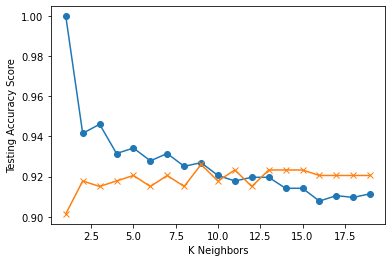

In [27]:
from sklearn.neighbors import KNeighborsClassifier
train_scores = []
test_scores = []
for k in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, price_bins)
    train_score = knn.score(X_train, price_bins)
    test_score = knn.score(X_test, Y_test_bins)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20), train_scores, marker='o')
plt.plot(range(1, 20), test_scores, marker="x")
plt.xlabel("K Neighbors")
plt.ylabel("Testing Accuracy Score")
plt.show()